In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D
from keras.layers import Dropout
from sklearn.metrics import accuracy_score

In [ ]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [ ]:
X_train = []
y_train = []
image_size = 150
x = 0
folderPath ='/content/drive/MyDrive/Clinical_Mastitis/Normal'
for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath,j))
    img = cv2.resize(img,(image_size, image_size))
    X_train.append(img)
    x +=1
    y_train.append(0)
    if(x==740):
      break
folderPath ='/content/drive/MyDrive/clinical_mastitis/normalAug'
y=0
for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath,j))
    img = cv2.resize(img,(image_size, image_size))
    X_train.append(img)
    y_train.append(1)
    y+=1


In [ ]:
print(x,y)

740 740


In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_train,y_train=shuffle(X_train,y_train,random_state=101)
X_train.shape

(1332, 150, 150, 3)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=.1,random_state=101)

In [ ]:
y_train.shape

(1198,)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 conv2d_28 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 73, 73, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 73, 73, 64)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_30 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
 #autosave best Model
#best_model_file = '/content/CNN_aug_best_weights.h5'
#best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [ ]:
history=model.fit(X_train,y_train,epochs=100,validation_split=.1,callbacks=callbacks)

Epoch 1/100
34/34 [==============================] - 6s 148ms/step - loss: 4.0479 - accuracy: 0.4722 - val_loss: 0.8154 - val_accuracy: 0.6500
Epoch 2/100
34/34 [==============================] - 3s 85ms/step - loss: 0.7170 - accuracy: 0.5677 - val_loss: 0.8107 - val_accuracy: 0.5083
Epoch 3/100
34/34 [==============================] - 3s 83ms/step - loss: 0.7073 - accuracy: 0.5186 - val_loss: 0.7348 - val_accuracy: 0.4917
Epoch 4/100
34/34 [==============================] - 3s 83ms/step - loss: 0.7377 - accuracy: 0.5473 - val_loss: 0.7380 - val_accuracy: 0.5083
Epoch 5/100
34/34 [==============================] - 3s 85ms/step - loss: 0.7077 - accuracy: 0.4926 - val_loss: 0.7939 - val_accuracy: 0.5083
Epoch 6/100
34/34 [==============================] - 3s 84ms/step - loss: 0.7112 - accuracy: 0.4833 - val_loss: 0.7024 - val_accuracy: 0.5083
Epoch 7/100
34/34 [==============================] - 3s 85ms/step - loss: 0.6996 - accuracy: 0.4972 - val_loss: 0.7438 - val_accuracy: 0.5083
Epoch

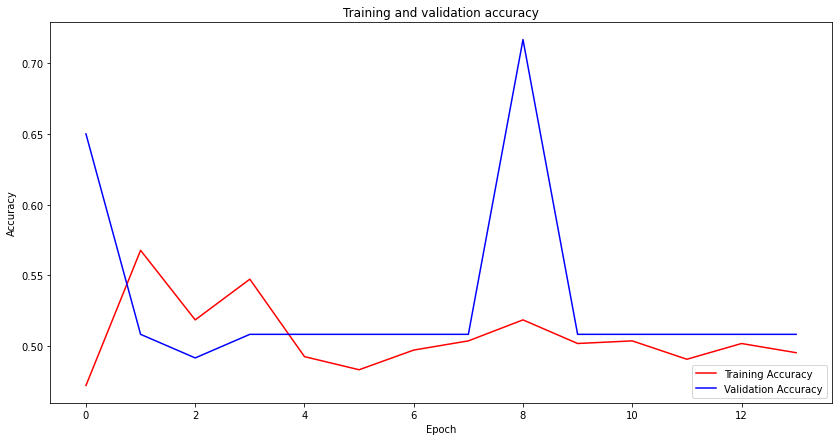

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

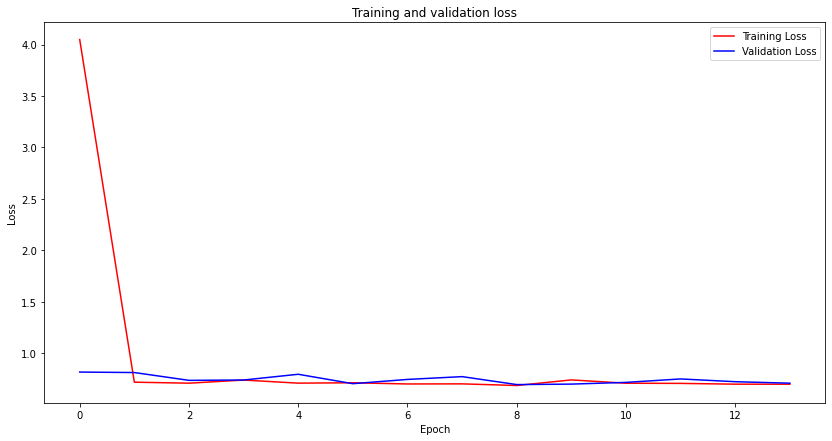

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)

5/5 [==============================] - 0s 35ms/step


In [ ]:
y_test.shape
pred.shape

(134,)

In [ ]:
accuracy = np.sum(pred==y_test)/np.size(pred)
print("Accuracy on testing dataset: {:.2f}%".format(accuracy*100))

Accuracy on testing dataset: 46.27%


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
print('Precision: %.3f' % precision_score(y_test, pred))

Precision: 0.000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Recall: %.3f' % recall_score(y_test,pred))

Recall: 0.000


In [ ]:
	print('F1 Score: %.3f' % f1_score(y_test, pred))

F1 Score: 0.000


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[62,  0],
       [72,  0]])

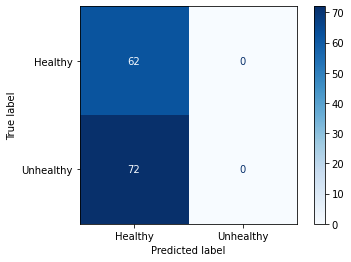

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
labels = ["Healthy","Unhealthy"]

cm = confusion_matrix(y_test, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()